In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

from annoy import AnnoyIndex
from ivis import Ivis

Using TensorFlow backend.


In [2]:
X = datasets.load_iris().data
Y = datasets.load_iris().target

In [3]:
X_scaled = MinMaxScaler().fit_transform(X)

In [4]:
ivis = Ivis(k = 5)
xy = ivis.fit_transform(X_scaled)

100%|██████████| 150/150 [00:00<00:00, 14801.68it/s]

Building KNN index
Extracting KNN from index


Training neural network
Epoch 1/1000
1/1 [==============================] - 1s 945ms/step - loss: 1.4332
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.5045
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 1.1826
Epoch 4/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.3612
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.3059
Epoch 6/1000
1/1 [==============================] - 0s 17ms/step - loss: 1.1534
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.0024
Epoch 8/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.9578
Epoch 9/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.8048
Epoch 10/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.8309
Epoch 11/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.7535
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.8645
Epoch 13/1000

Text(0,0.5,'ivis2')

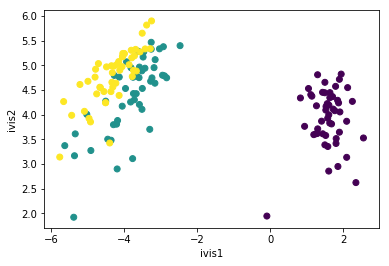

In [5]:
plt.scatter(x=xy[:, 0], y=xy[:, 1], c = Y)
plt.xlabel('ivis1')
plt.ylabel('ivis2')

In [ ]:
ivis.save_model('iris.ivis')